In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-101/indian_food.csv


In [76]:
data=pd.read_csv("/kaggle/input/indian-food-101/indian_food.csv")
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [77]:
# Unique values for each columns

# print(pd.unique(data.ingredients))
print(pd.unique(data.flavor_profile))
print(pd.unique(data.course))
# print(pd.unique(data.diet))
# print(pd.unique(data.state))
### data.loc[data['state'] == '-1']

['sweet' 'spicy' 'bitter' '-1' 'sour']
['dessert' 'main course' 'starter' 'snack']


In [78]:
# Cleaning Data
# data.loc[data['flavor_profile']== '-1']
# data.loc[data['name']=='Copra paak','flavor_profile']
data.loc[data['name'].isin(['Copra paak','Puttu','Kansar']),'flavor_profile']='sweet'
data.loc[data['flavor_profile'] == '-1', 'flavor_profile'] = "other"


In [79]:
# Cleaned values
data.tail(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
245,Pani Pitha,"Tea leaves, white sesame seeds, dry coconut, s...",vegetarian,10,20,other,main course,Assam,North East
246,Payokh,"Basmati rice, rose water, sugar, clarified but...",vegetarian,-1,-1,sweet,dessert,Assam,North East
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East
248,Red Rice,"Red pepper, red onion, butter, watercress, oli...",vegetarian,-1,-1,other,main course,-1,-1
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [80]:
# Performing One hot encoding
discrete_df = pd.get_dummies(data,columns=['ingredients','diet','flavor_profile'])
discrete_df

,name,prep_time,cook_time,course,state,region,"ingredients_Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick","ingredients_Aloo, urad dal, mustard, ginger, curry leaves","ingredients_Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili","ingredients_Apricots, sugar syrup",...,"ingredients_Yogurt, fresh coconut, sesame seeds, semolina, gram flour","ingredients_Yogurt, ginger, curry leaves, baking soda, green chilli","ingredients_Yogurt, milk, nuts, sugar",diet_non vegetarian,diet_vegetarian,flavor_profile_bitter,flavor_profile_other,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet
0,Balu shahi,45,25,dessert,West Bengal,East,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,Boondi,80,30,dessert,Rajasthan,West,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,Gajar ka halwa,15,60,dessert,Punjab,North,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,Ghevar,15,30,dessert,Rajasthan,West,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,Gulab jamun,15,40,dessert,West Bengal,East,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,5,30,dessert,Assam,North East,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
251,Bebinca,20,60,dessert,Goa,West,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
252,Shufta,-1,-1,dessert,Jammu & Kashmir,North,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
253,Mawa Bati,20,45,dessert,Madhya Pradesh,Central,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [81]:
target= data['course']
df= discrete_df.drop(columns=['course','state','region','name'],axis=1)
df

,prep_time,cook_time,"ingredients_Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick","ingredients_Aloo, urad dal, mustard, ginger, curry leaves","ingredients_Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili","ingredients_Apricots, sugar syrup","ingredients_Arbi ke patte, sesame seeds, gur, bengal gram flour, imli","ingredients_Arhar dal, coconut oil, curry leaves, mustard seeds, red chilli","ingredients_Arhar dal, sambar powder, tomato, curry leaves, fennel seeds","ingredients_Baby corn, french beans, garam masala, ginger, carrot",...,"ingredients_Yogurt, fresh coconut, sesame seeds, semolina, gram flour","ingredients_Yogurt, ginger, curry leaves, baking soda, green chilli","ingredients_Yogurt, milk, nuts, sugar",diet_non vegetarian,diet_vegetarian,flavor_profile_bitter,flavor_profile_other,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet
0,45,25,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,80,30,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,15,60,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,15,30,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,15,40,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,5,30,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
251,20,60,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
252,-1,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
253,20,45,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# **Label Encoding**

In [82]:
# Converting target string to numeric labels

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['course'])
label
# 0='dessert' 1='main course' 2='starter' 3='snack'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 3, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

# **Train Test Split**

In [83]:
# Spliting data inro training set and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(df,label, test_size=0.2,random_state=0) 
# len(X_test)

# **Decision Tree Algorithm**

In [84]:
# implementing classification algorithm
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train, Y_train)
# 0='dessert' 1='main course' 2='starter' 3='snack'
ypred = model1.predict(X_test)
ypredct = le.inverse_transform(ypred)
# print(ypredct)

# Checking accuracy
accuracy1 = model1.score(X_test, Y_test)
print(accuracy1)
from sklearn.metrics import classification_report
report1=classification_report(Y_test, ypred)
print(report1)

0.8235294117647058
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.79      0.88      0.83        25
           2       0.60      0.33      0.43         9

    accuracy                           0.82        51
   macro avg       0.78      0.74      0.74        51
weighted avg       0.81      0.82      0.81        51



In [85]:
# report=classification_report(Y_test, ypred,output_dict=True)
# macro_precision =  report['macro avg']['precision']
# macro_precision

# **Random Forest Algorithm**

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(n_estimators=2 ,min_samples_split=3 , min_samples_leaf=2)
clf.fit(X_train,Y_train)
pred_clf = clf.predict(X_test)

accuracyN = clf.score(X_test, Y_test)
print(accuracyN)
reportN=classification_report(Y_test, pred_clf)
print(reportN)

0.49019607843137253
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.49      1.00      0.66        25
           2       0.00      0.00      0.00         9

    accuracy                           0.49        51
   macro avg       0.16      0.33      0.22        51
weighted avg       0.24      0.49      0.32        51



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[2,5,10,20],"min_samples_split":[2,3],"min_samples_leaf":[1,2,3]}
grid_search = GridSearchCV(estimator=clf,param_grid=param_grid)
grid_search.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=RandomForestClassifier(min_samples_leaf=2,
                                              min_samples_split=3,
                                              n_estimators=2),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [2, 5, 10, 20]})

In [88]:
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

# **Random Forest with Updated Parameters**

In [89]:
model2 = RandomForestClassifier(n_estimators=20 ,min_samples_split=2 , min_samples_leaf=1)
model2.fit(X_train,Y_train)
ypred2 = model2.predict(X_test)

accuracy2= model2.score(X_test, Y_test)
print(accuracy2)
print(classification_report(Y_test, ypred2))

0.8235294117647058
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.75      0.96      0.84        25
           2       1.00      0.11      0.20         9

    accuracy                           0.82        51
   macro avg       0.90      0.69      0.67        51
weighted avg       0.86      0.82      0.77        51



# **Logistic Regression Algorithm**

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
model3 = Pipeline([('minmax',MinMaxScaler()),('lr',LogisticRegression())])
model3.fit(X_train,Y_train)
ypred3 = model3.predict(X_test)

accuracy3 = model3.score(X_test,Y_test)
print(accuracy3)
print(classification_report(Y_test, ypred3))

0.803921568627451
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.73      0.96      0.83        25
           2       0.00      0.00      0.00         9

    accuracy                           0.80        51
   macro avg       0.56      0.65      0.60        51
weighted avg       0.67      0.80      0.73        51



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


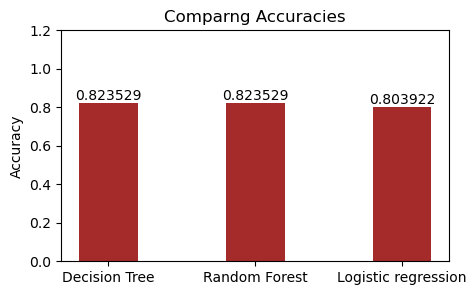

In [91]:
plt.figure(figsize=(5,3))
p=plt.bar(['Decision Tree','Random Forest','Logistic regression'],[accuracy1,accuracy2,accuracy3],width=0.4,color='brown')
plt.title('Comparng Accuracies')
plt.bar_label(p)
plt.ylabel('Accuracy')
plt.ylim(0.0,1.2)
plt.show()


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

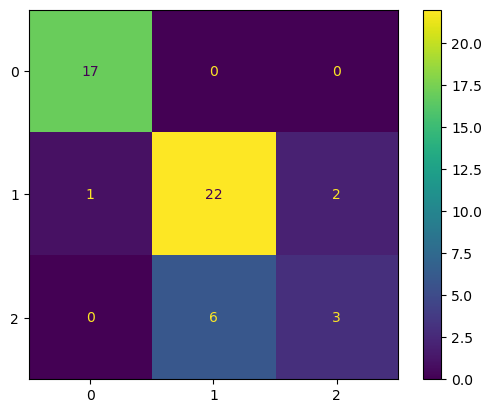

In [94]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()